# Notebook Dedicated to Compute the Efficency of Survived events after cuts

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

from scipy.special import factorial
from lmfit import Model
from scipy.optimize import curve_fit

import pandas as pd

import glob

# Load MC Data

Lets read the data as follows:
1) Create a list of the main folders output_0, output_1, ...
2) Create a list with the file names of the observables to be readen
3) Take the ith diretory of the list of main folders, and join it to the observable name list to be readen and save the observables values for each iteration over output_i folders

In [2]:
#Main Data Directory
main_dir = 'E:/Data/antinu/mc/geo_nu_Th/out_results/'
folder_name_pattern = 'output_*/'

main_dir_list = glob.glob(main_dir + folder_name_pattern)
main_dir_list

#Observable file names to be readen
obs_real_list = ['dt', 'dr', 'energy_prompt', 'energy_delay', 'initial_pairs']

#Dictionary with empty np.arrays of the observables to be readen
observable_dict = {obs_i : np.array([]) for obs_i in obs_real_list}

#Iteration over main directory list
for main_dir_list_i in main_dir_list:
    print(f'reading folder {main_dir_list_i}')
    #Create the directories for the observables (defined along the next iteration) to be readen using the main_dir_list_i and save its value
    for obs_i in obs_real_list:
        print(f'saving information of observable {obs_i}')
        dir_obs_i = main_dir_list_i + obs_i + '.npy'  #Create the full directory of the observable 
        array_obs_i = np.load(dir_obs_i)              #Load the numpy array of the corresponding observable obs_i
        observable_dict[str(obs_i)] = np.append(observable_dict[str(obs_i)], array_obs_i)  #Save the observable in the dictionary


#Define energy cut on prompt and delay to plot. In the MC data is seen how there are energy values higher than 8 MeV
#Extract energy arrays to perform cuts
initial_pairs_ev = observable_dict['initial_pairs']
energy_prompt = observable_dict['energy_prompt']
energy_delay = observable_dict['energy_delay'] #Limit energy delay, but this is strange to be larger ...
dt = observable_dict['dt']
dr = observable_dict['dr']

reading folder E:/Data/antinu/mc/geo_nu_Th/out_results\output_0\
saving information of observable dt
saving information of observable dr
saving information of observable energy_prompt
saving information of observable energy_delay
saving information of observable initial_pairs
reading folder E:/Data/antinu/mc/geo_nu_Th/out_results\output_1\
saving information of observable dt
saving information of observable dr
saving information of observable energy_prompt
saving information of observable energy_delay
saving information of observable initial_pairs
reading folder E:/Data/antinu/mc/geo_nu_Th/out_results\output_10\
saving information of observable dt
saving information of observable dr
saving information of observable energy_prompt
saving information of observable energy_delay
saving information of observable initial_pairs
reading folder E:/Data/antinu/mc/geo_nu_Th/out_results\output_11\
saving information of observable dt
saving information of observable dr
saving information of observab

## Apply the Same cuts as Used in the Real Data Analysis!

In [3]:
energy_prompt_inf_cut = 1.6
energy_prompt_sup_cut = 8.0

energy_delay_inf_cut = 1.9
energy_delay_sup_cut = 2.3

dt_sup_lim = 1000
dt_inf_lim = 0.5

dr_sup_lim = 900

energy_condition = (energy_prompt >= energy_prompt_inf_cut) & (energy_prompt <= energy_prompt_sup_cut) & (energy_delay >= energy_delay_inf_cut) & (energy_delay <= energy_delay_sup_cut)
dt_condition = (dt > dt_inf_lim) & (dt <= dt_sup_lim) 
dr_condition = (dr <= dr_sup_lim)

cut_condition = energy_condition & dt_condition & dr_condition

energy_prompt = energy_prompt[cut_condition]
energy_delay = energy_delay[cut_condition]
dt = dt[cut_condition]
dr = dr[cut_condition]

In [4]:
len(energy_prompt)

8

<Axes: ylabel='Count'>

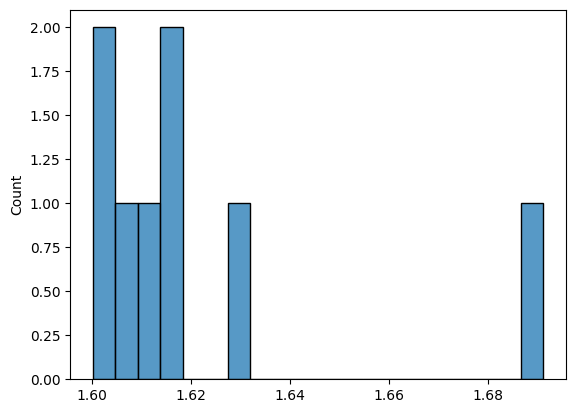

In [5]:
sn.histplot(energy_prompt, bins = 20)

<Axes: ylabel='Count'>

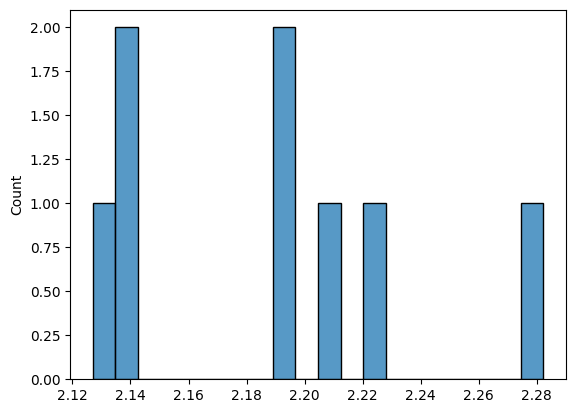

In [6]:
sn.histplot(energy_delay, bins = 20)

<Axes: ylabel='Count'>

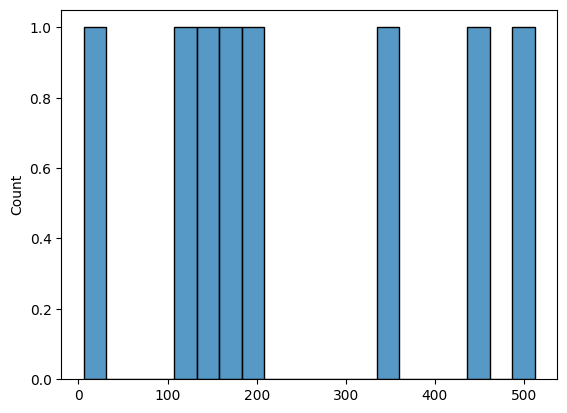

In [7]:
sn.histplot(dt, bins = 20)

<Axes: ylabel='Count'>

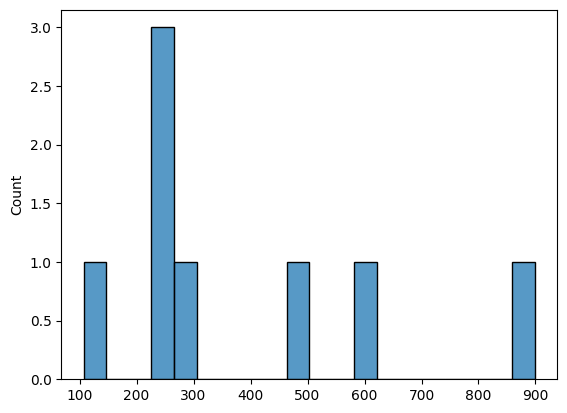

In [8]:
sn.histplot(dr, bins = 20)

# MC Efficiency Cuts Calculation

In [9]:
initial_n_of_pairs = np.sum(initial_pairs_ev)
final_n_of_pairs = len(energy_delay)
eff_mc_cut = final_n_of_pairs/initial_n_of_pairs

print(f'Initial number of pairs = {initial_n_of_pairs}. Final Number of pairs after cuts = {final_n_of_pairs}')
print(f'effiency of MC cuts = {eff_mc_cut}')

Initial number of pairs = 70720.0. Final Number of pairs after cuts = 8
effiency of MC cuts = 0.00011312217194570136


In [10]:
init = 70720.0 + 245111.0
final = 8 + 56530

final/init

0.1790134597300455